<a href="https://colab.research.google.com/github/urvashi-agrawal-dev/Machine-learning/blob/main/hierarchial_clustering_2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
raw_df = pd.read_csv('/content/dataset.csv')
raw_df = raw_df.drop(columns=['N'])
raw_df.head(5)


,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,69,217,5.9,0.58,0.23,10.20,116.35,59.96,54.85,21.29,pomegranate
1,36,216,5.9,0.15,0.28,15.69,114.20,56.87,31.28,28.62,pomegranate
2,66,219,6.8,0.34,0.20,15.29,65.87,51.81,57.12,27.59,pomegranate
3,45,207,6.4,0.94,0.21,8.48,103.10,43.81,68.50,47.29,pomegranate
4,48,218,6.7,0.54,0.19,5.59,63.40,56.40,46.71,31.04,pomegranate


In [4]:
LabelEncoder
raw_df['label'] = LabelEncoder().fit_transform(raw_df['label'])
scaler = StandardScaler()
scaler_df = scaler.fit_transform(raw_df)
normalized_df = pd.DataFrame(scaler_df)
pca = PCA(n_components=2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2']
X_principal.head(5)


,P1,P2
0,0.664906,-1.422800
1,0.004247,-0.055946
2,0.496395,-1.250490
3,0.147677,-2.190726
4,0.580463,-1.432530


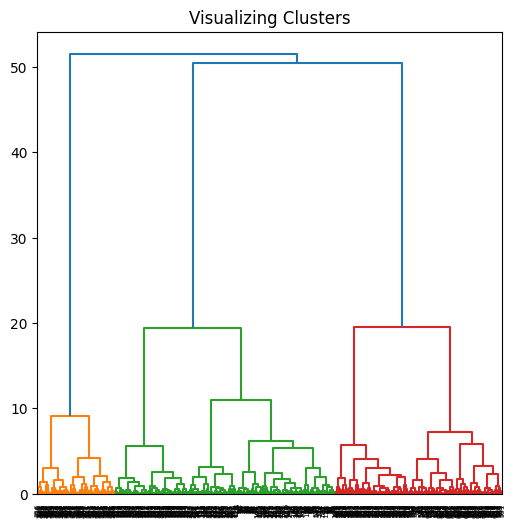

In [5]:
plt.figure(figsize=(6,6))
plt.title('Visualizing Clusters')
Dendrogram = shc.dendrogram(shc.linkage(X_principal,method='ward'))

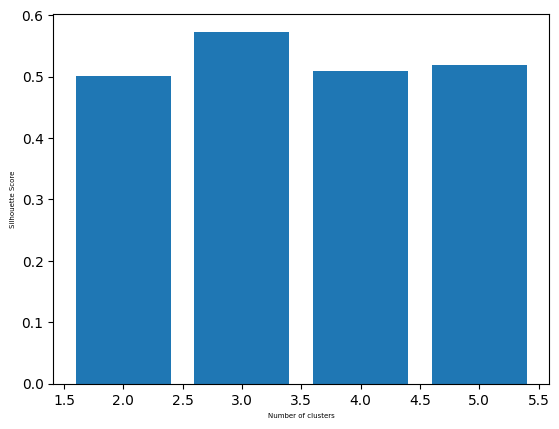

In [22]:
silhouette_scores=[]
for n_cluster in range(2,6):
  silhouette_scores.append(
      silhouette_score(X_principal,AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))
  )
k=[2,3,4,5]
plt.bar(k,silhouette_scores)
plt.xlabel('Number of clusters',fontsize=5)
plt.ylabel('Silhouette Score',fontsize = 5)
plt.show()

In [24]:
agg=AgglomerativeClustering(n_clusters=3)
agg.fit_predict(X_principal)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

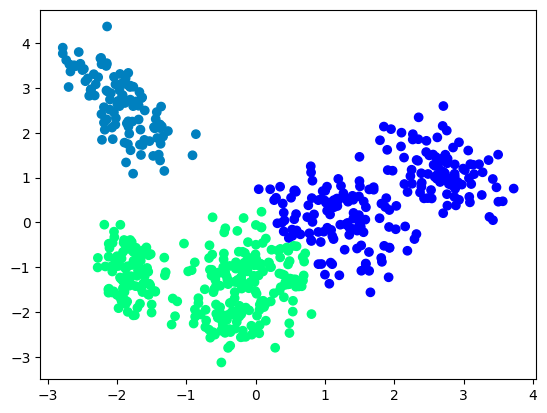

In [25]:
plt.scatter(X_principal['P1'],X_principal['P2'],c=AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal),cmap=plt.cm.winter)
plt.show()